In [77]:
import numpy as np
import cv2
from ex1_utils import *
from ex2_utils import *
import matplotlib.pyplot as plt

In [ ]:
def mean_shift(img, window_size=5, max_iter=100, min_diff=1e-4, start=(50,50)):
    kernel = create_epanechnik_kernel(window_size, window_size, 2)
    
    x_coor = np.tile(np.arange(start=np.ceil(-window_size/2), stop=window_size//2 + 1, step=1), (5,1))
    y_coor = x_coor.T

    x_loc, y_loc = start

    # Start iterations
    for i in range(max_iter):
        patch, mask = get_patch(img, (x_loc, y_loc), (5,5))

        weights = patch * kernel
        
        sum_x = np.sum(x_coor * weights)
        sum_y = np.sum(y_coor * weights)
        
        denom = np.sum(weights)
        
        if denom == 0:
            break
        
        
        shift_x = sum_x / denom
        shift_y = sum_y / denom
        
        if shift_x < min_diff and shift_y < min_diff:
            break
        
        x_loc += shift_x
        y_loc += shift_y
        
        # Make a random move
        if (x_loc, y_loc) == start:
            x_loc += np.random.randint(low=3, high=3)
            y_loc += np.random.randint(low=3, high=3)
        
        if i % (max_iter // 10) == 0:
            print(f"Iteration {i}: x_loc={x_loc:.2f}, y_loc={y_loc:.2f}")
    
    return x_loc, y_loc

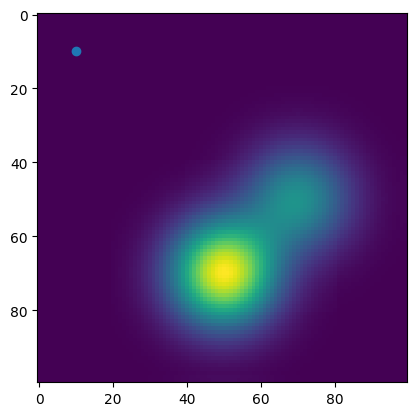

In [118]:
img = generate_responses_1()
plt.imshow(img)

x, y = mean_shift(img, max_iter=5000, start=(10, 10))
plt.scatter([x], [y])